In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv("earthquake_data_tsunami.csv")

In [4]:
df.head(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [7]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [8]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

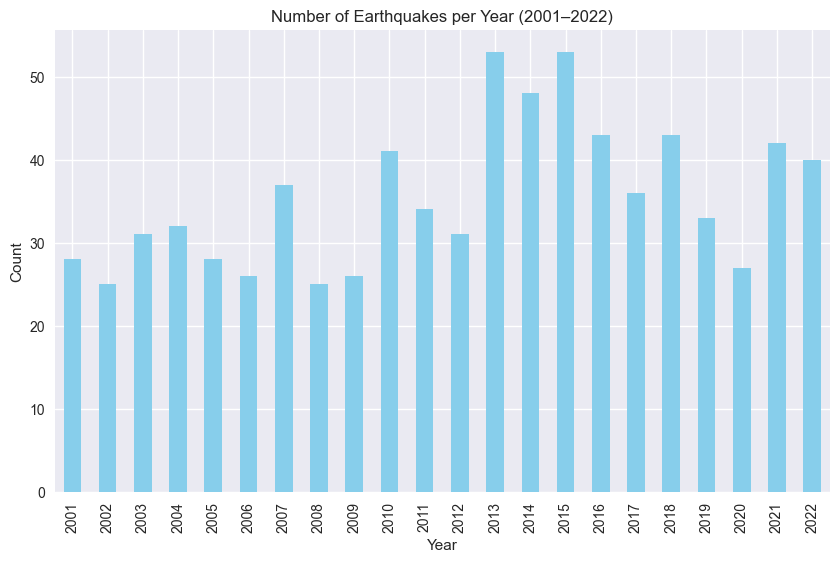

In [10]:
# Count of earthquakes per year
yearly_counts = df.groupby('Year').size()
plt.figure()
yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Earthquakes per Year (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

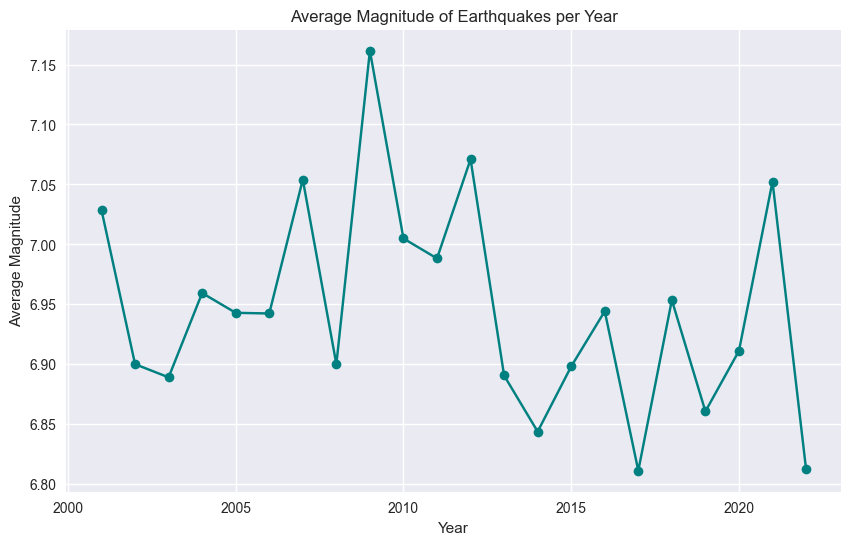

In [11]:
plt.figure()
df.groupby('Year')['magnitude'].mean().plot(marker='o', color='teal')
plt.title("Average Magnitude of Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.grid(True)
plt.show()

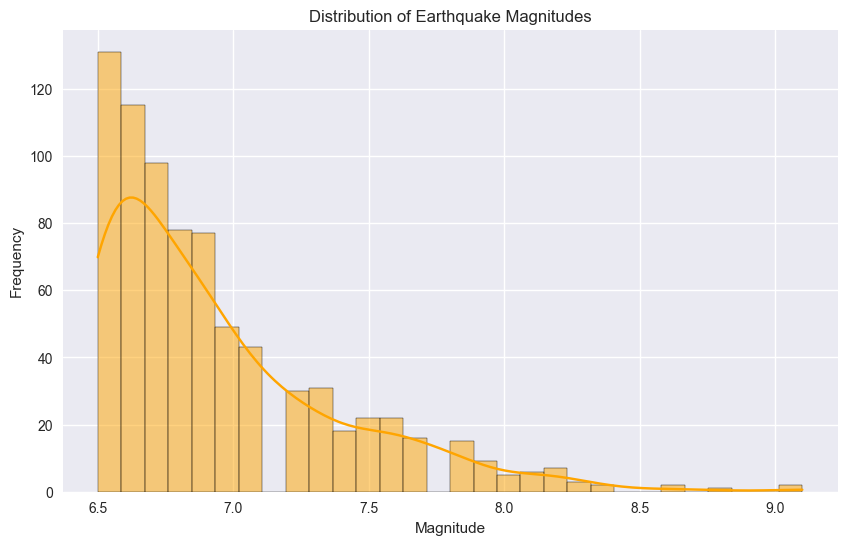

In [12]:
plt.figure()
sns.histplot(df['magnitude'], bins=30, kde=True, color='orange')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

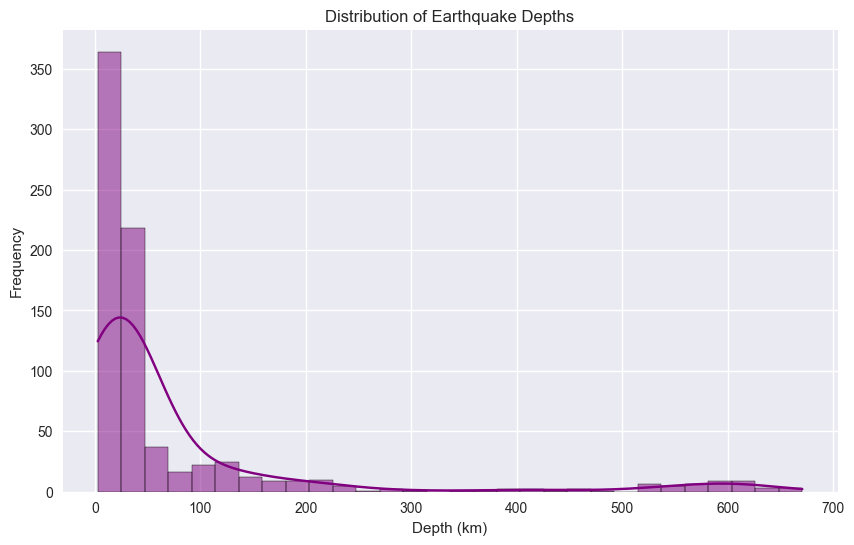

In [13]:
plt.figure()
sns.histplot(df['depth'], bins=30, kde=True, color='purple')
plt.title("Distribution of Earthquake Depths")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

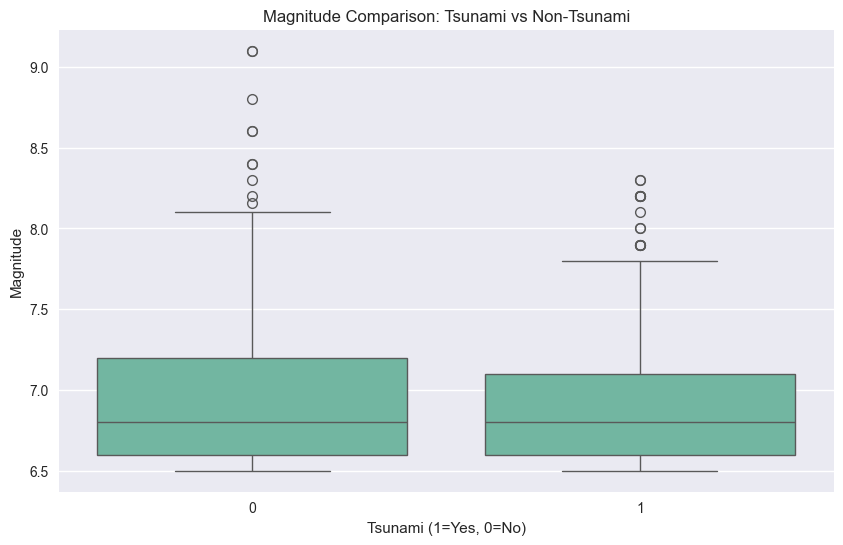

In [14]:
plt.figure()
sns.boxplot(x='tsunami', y='magnitude', data=df)
plt.title("Magnitude Comparison: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1=Yes, 0=No)")
plt.ylabel("Magnitude")
plt.show()

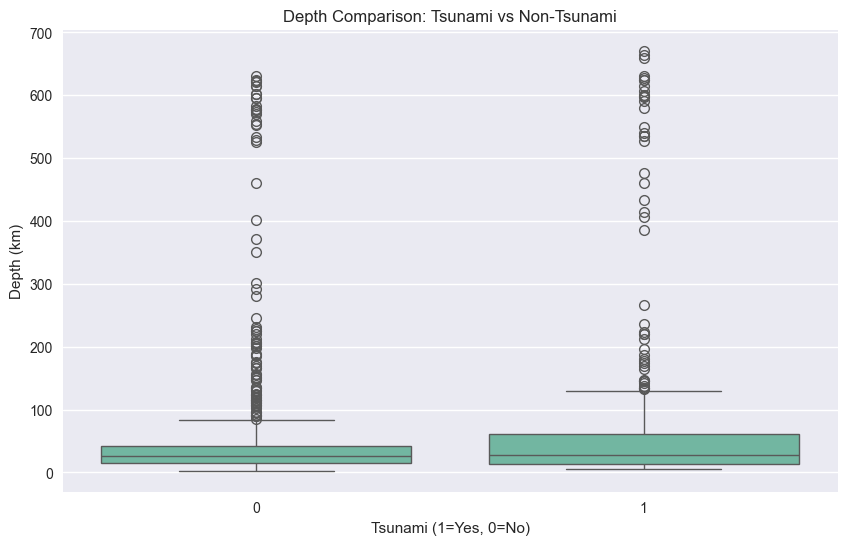

In [15]:
plt.figure()
sns.boxplot(x='tsunami', y='depth', data=df)
plt.title("Depth Comparison: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1=Yes, 0=No)")
plt.ylabel("Depth (km)")
plt.show()


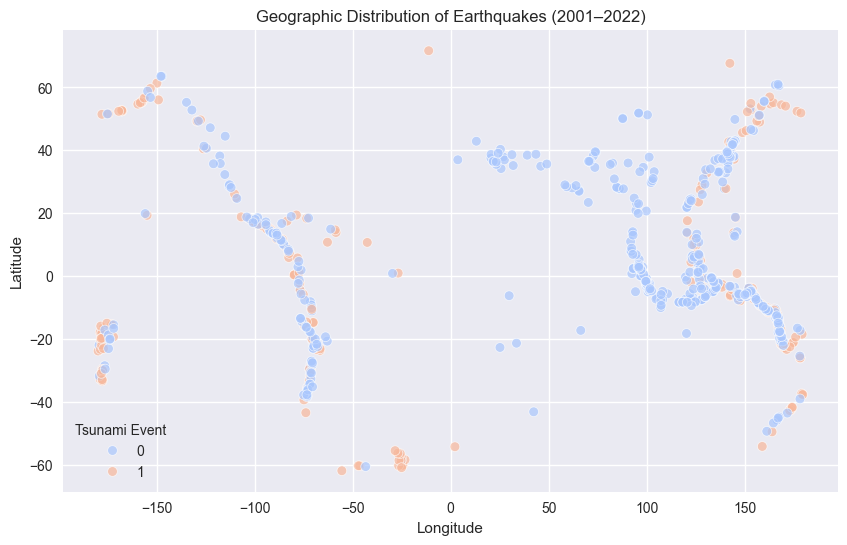

In [17]:
plt.figure()
sns.scatterplot(x='longitude', y='latitude', data=df, hue='tsunami', palette='coolwarm', alpha=0.7)
plt.title("Geographic Distribution of Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Tsunami Event")
plt.show()

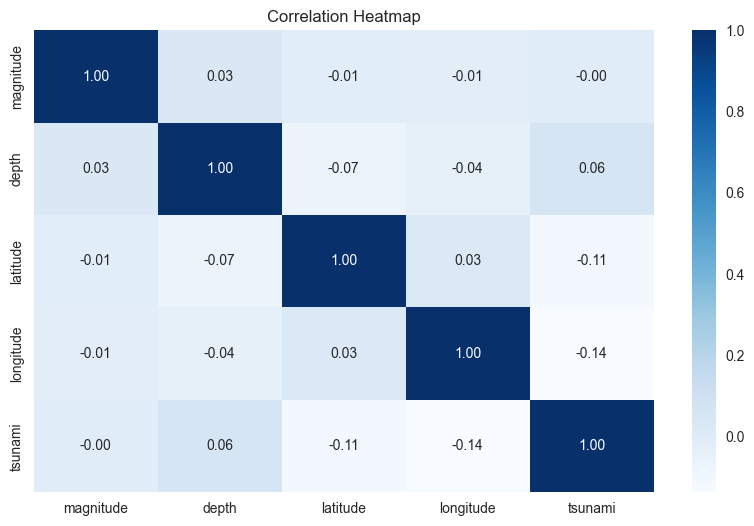

In [18]:
corr = df[['magnitude', 'depth', 'latitude', 'longitude', 'tsunami']].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Avita\AppData\Local\Temp\ipykernel_9684\3323526106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tsunami', data=df, palette='pastel')


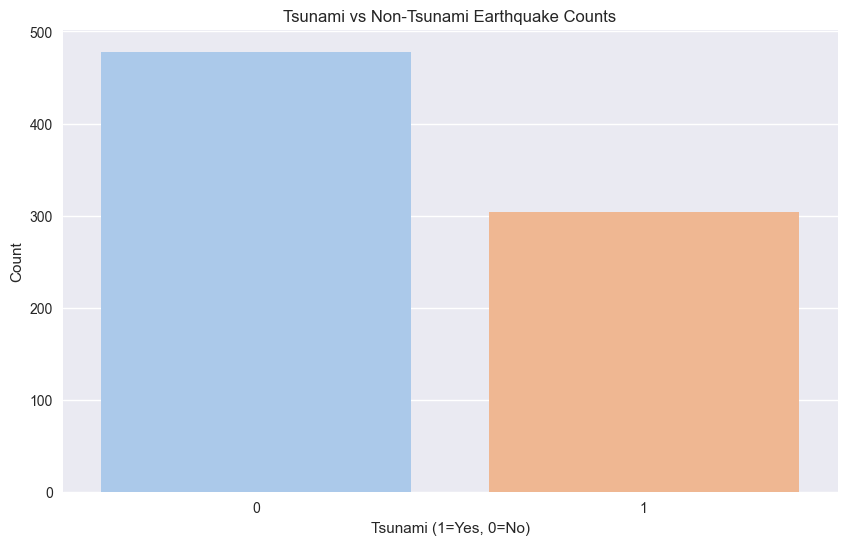

In [19]:
plt.figure()
sns.countplot(x='tsunami', data=df, palette='pastel')
plt.title("Tsunami vs Non-Tsunami Earthquake Counts")
plt.xlabel("Tsunami (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()